# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#creating the connection
conn=sqlite3.connect('inventory.db')

# fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,vendornumber,vendorname,brand,description,actualprice,purchaseprice,volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis

In [6]:
# summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
actualprice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
purchaseprice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totalpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


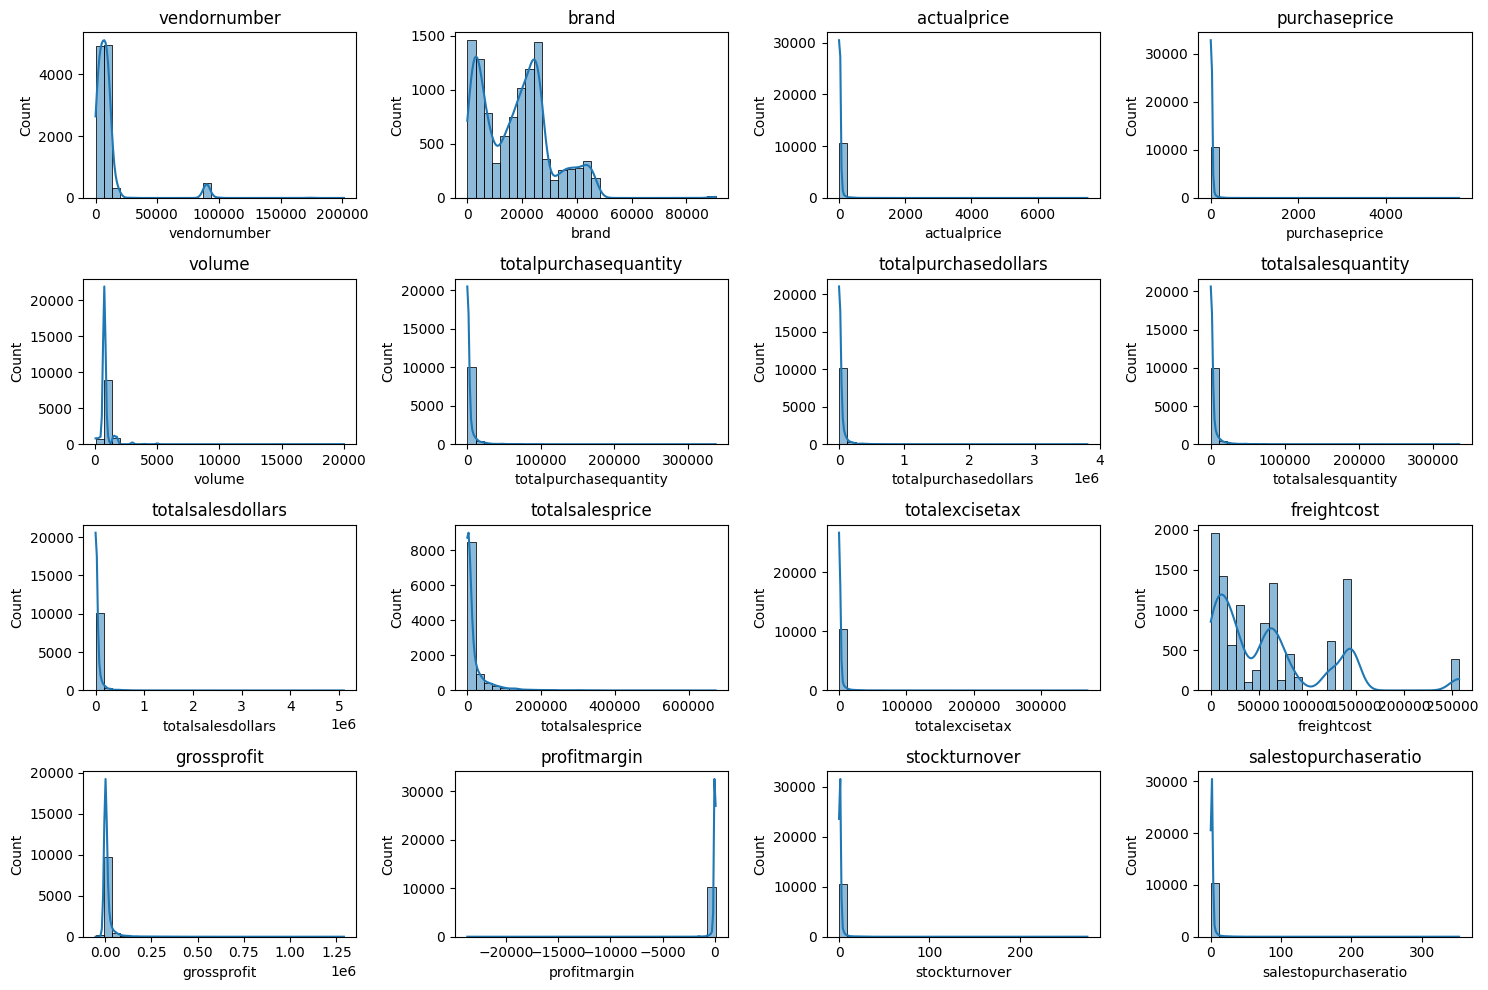

In [7]:
# Distribution of numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #adjust gridlayout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

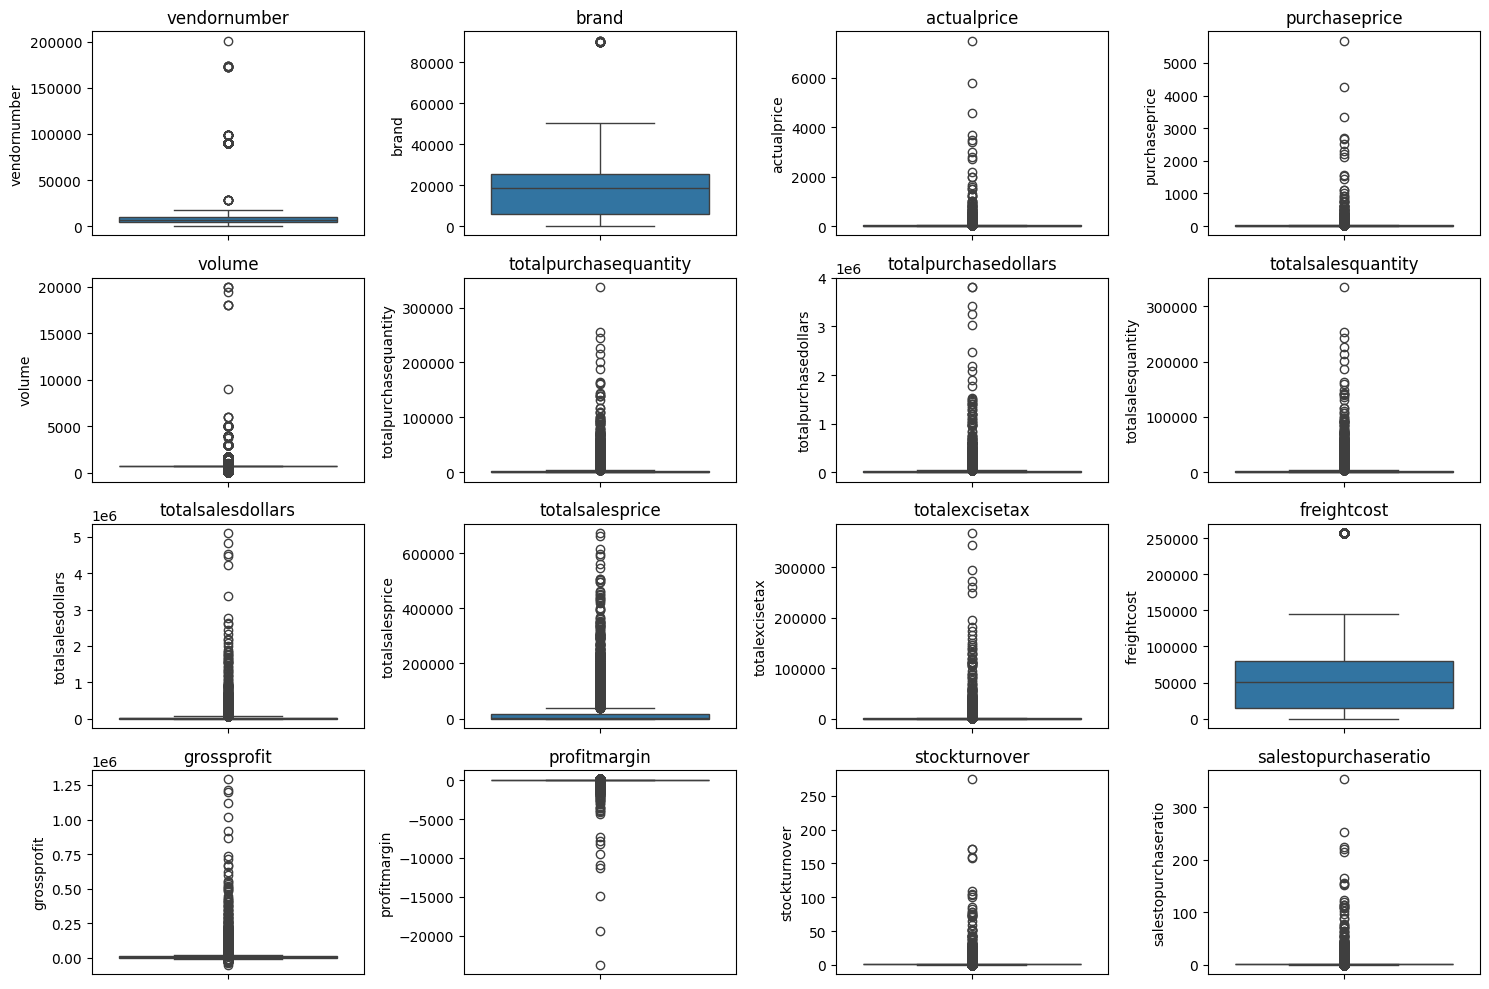

In [10]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
 # filtering the data by removing inconsistent or unwanted outlier
df=pd.read_sql_query("""select * from vendor_sales_summary
where grossprofit>0 and profitmargin>0 and totalsalesquantity>0""",conn)

In [14]:
df

,vendornumber,vendorname,brand,description,actualprice,purchaseprice,volume,totalpurchasequantity,totalpurchasedollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,1.32,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,0.39,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,0.74,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,1.47,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


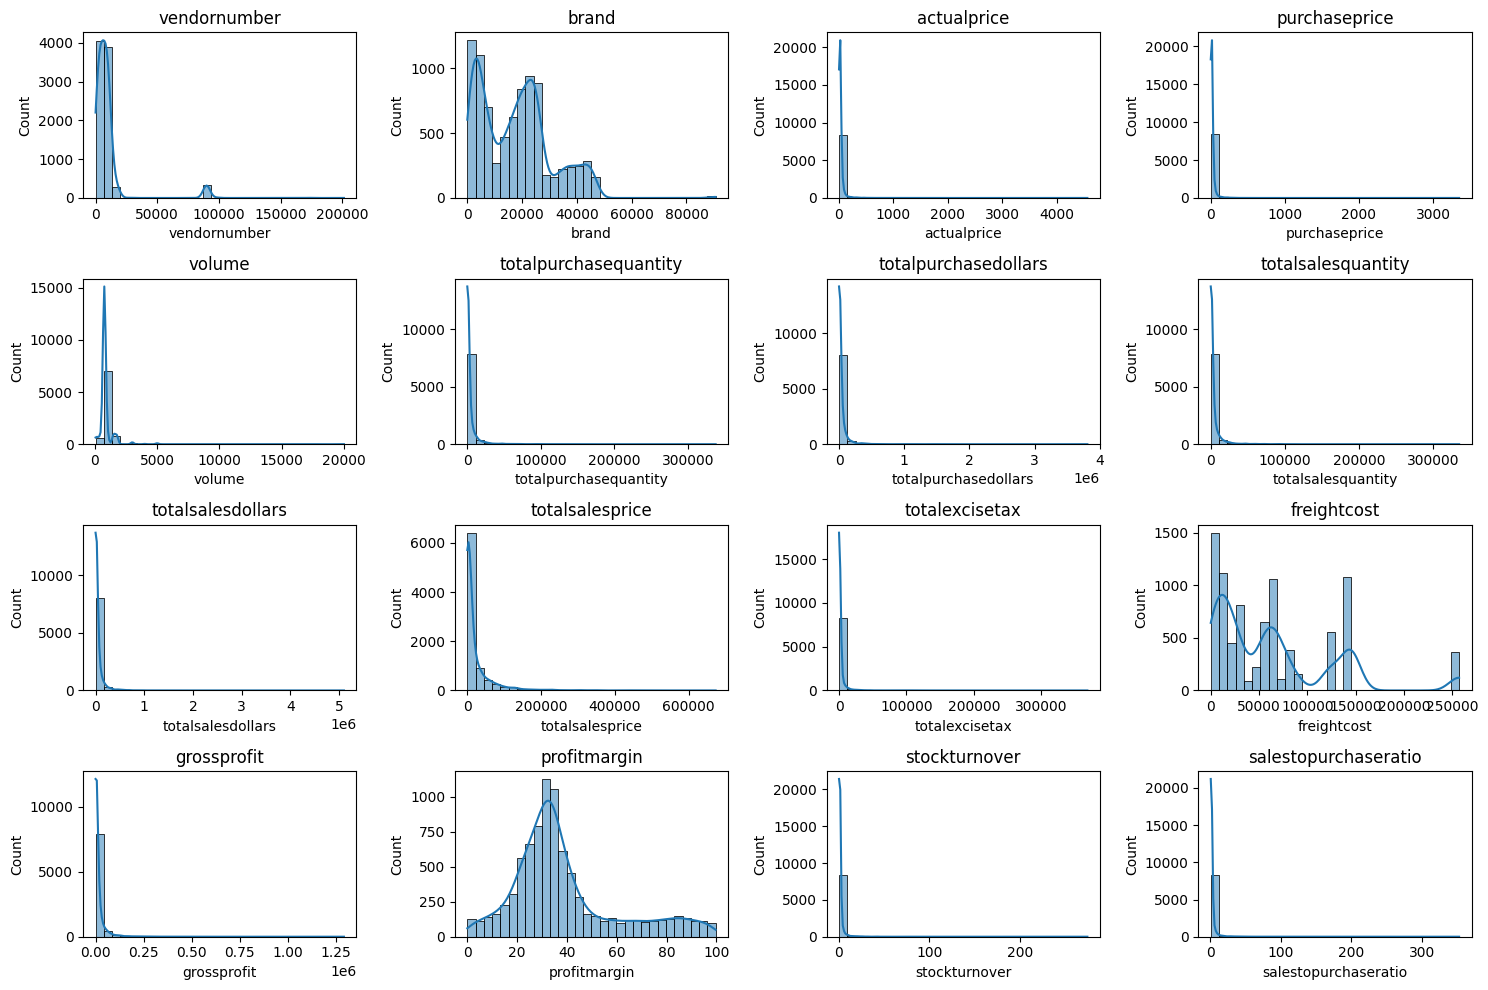

In [15]:
# Distribution of numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #adjust gridlayout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

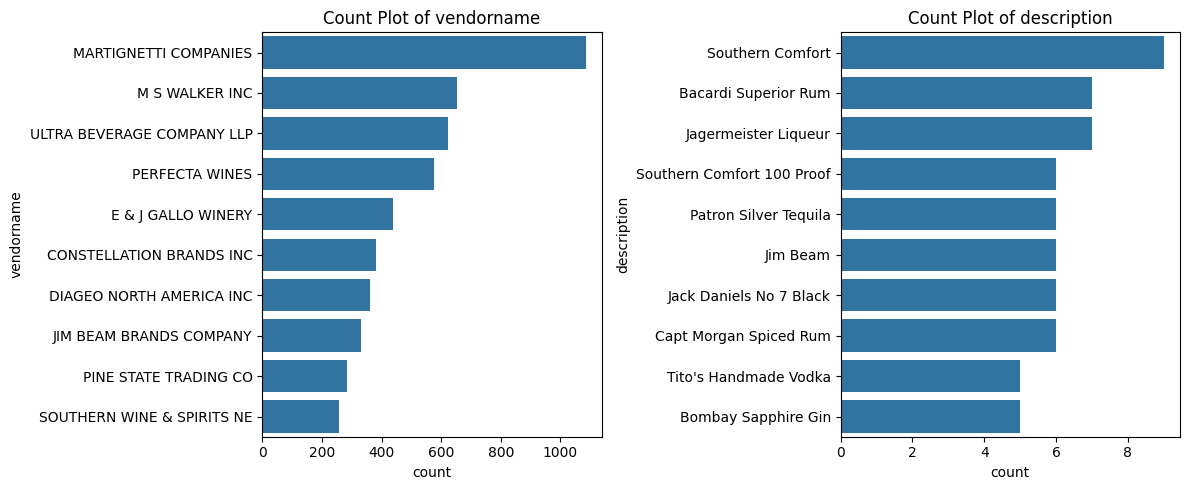

In [17]:
# Count Plots for Categorical Columns
categorical_cols=["vendorname","description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show
    

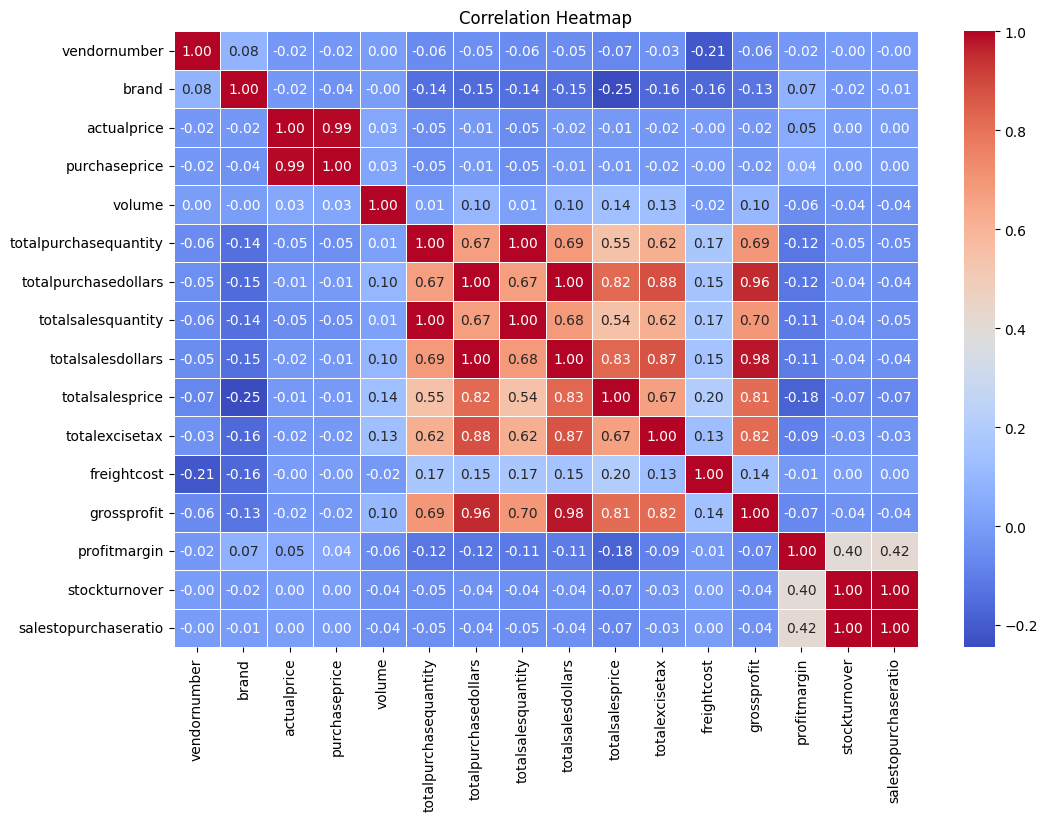

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Data Analysis

**Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.**

In [20]:
brand_performance=df.groupby('description').agg(
    {'totalsalesdollars':'sum',
     'profitmargin':'mean'}
).reset_index()

In [21]:
low_sales_threshold=brand_performance["totalsalesdollars"].quantile(0.15)
high_margin_threshold=brand_performance["profitmargin"].quantile(0.85)

In [22]:
low_sales_threshold

560.299

In [23]:
high_margin_threshold

64.97017552750113

In [24]:
# Filter brands with low sales but high profit margins
target_brands=brand_performance[(brand_performance["totalsalesdollars"]<=low_sales_threshold) & (brand_performance["profitmargin"]>=high_margin_threshold)]

print("Brands with low sales but high performance:")
display(target_brands.sort_values('totalsalesdollars'))

Brands with low sales but high performance:


,description,totalsalesdollars,profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [28]:
brand_performance=brand_performance[brand_performance['totalsalesdollars']<1000] # for better visualization

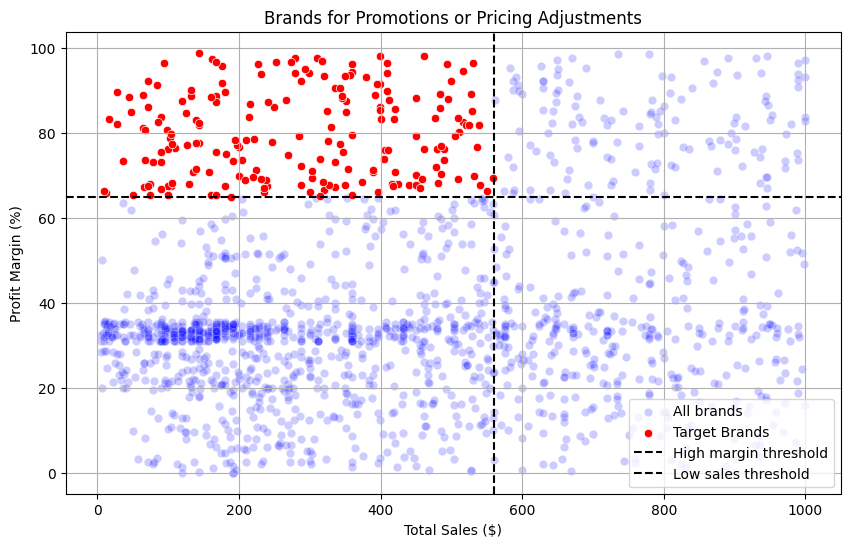

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='totalsalesdollars',y="profitmargin",color="blue",label="All brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='totalsalesdollars',y="profitmargin",color="red",label="Target Brands")

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='High margin threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='Low sales threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotions or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

**Which vendors and brands demonstrate the highest sales performance?**

In [34]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [32]:
# Top Vendors & Brands by Sales Performance
top_vendors=df.groupby('vendorname')["totalsalesdollars"].sum().nlargest(10)
top_brands=df.groupby('description')["totalsalesdollars"].sum().nlargest(10)
top_vendors

vendorname
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdollars, dtype: float64

In [35]:
top_brands.apply(lambda x: format_dollars(x))

description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

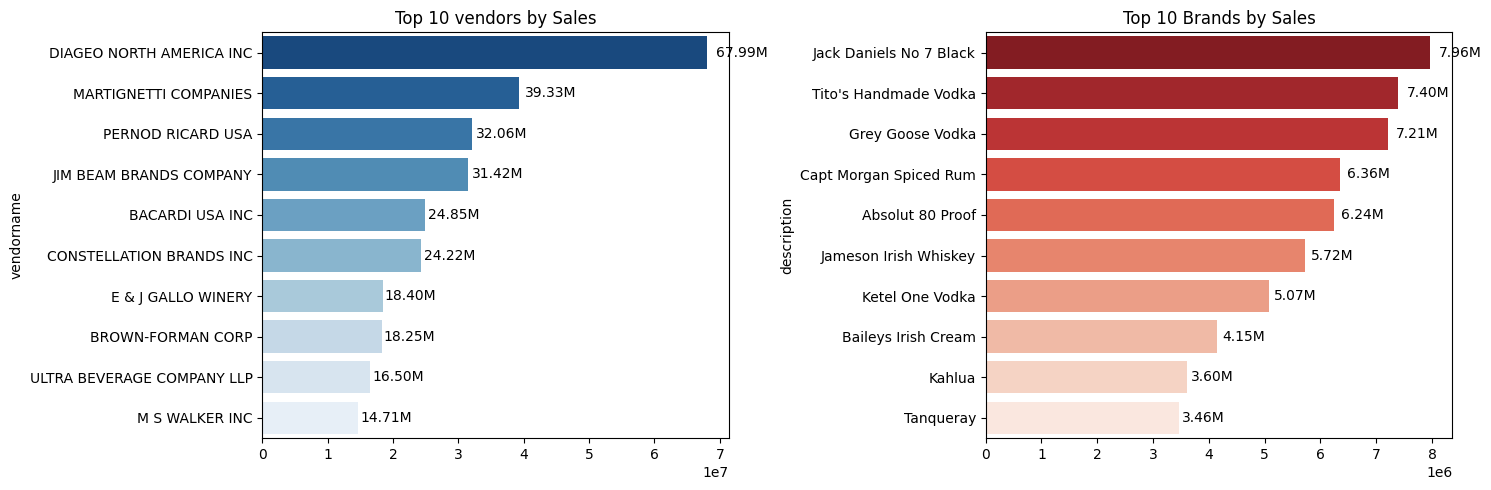

In [36]:
plt.figure(figsize=(15,5))

# Plt of Top Vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),ha='left',va='center',fontsize=10,color='black')


#plt for top brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

**Which vendors contribute the most to total purchase dollars?**

In [39]:
vendor_performance=df.groupby('vendorname').agg(
    {'totalpurchasedollars':'sum',
     'grossprofit':'sum',
     'totalsalesdollars':'sum'}
).reset_index()


In [40]:
vendor_performance

,vendorname,totalpurchasedollars,grossprofit,totalsalesdollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [55]:
vendor_performance['purchasecontribution%']=(vendor_performance['totalpurchasedollars']/vendor_performance['totalpurchasedollars'].sum())*100
vendor_performance=round(vendor_performance.sort_values('purchasecontribution',ascending=False),2)

In [62]:
del top_vendors['purchasecontribution']

In [63]:
# Display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['totalsalesdollars']=top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors['totalpurchasedollars']=top_vendors['totalpurchasedollars'].apply(format_dollars)
top_vendors['grossprofit']=top_vendors['grossprofit'].apply(format_dollars)
top_vendors

,vendorname,totalpurchasedollars,grossprofit,totalsalesdollars,purchasecontribution,purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,16.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,7.64
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,8.30
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,3.18


In [52]:
top_vendors['purchasecontribution'].sum()

0.6600000000000001

In [65]:
top_vendors['cumulativecontribution%']=top_vendors['purchasecontribution%'].cumsum()
top_vendors

,vendorname,totalpurchasedollars,grossprofit,totalsalesdollars,purchasecontribution,purchasecontribution%,cumulativecontribution,cumulativecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,16.30,0.16,16.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,7.76,0.24,24.06
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,7.64,0.32,31.70
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,8.30,0.40,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,5.67,0.46,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,4.97,0.51,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,4.31,0.55,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,3.93,0.59,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,3.63,0.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,3.18,0.66,65.69


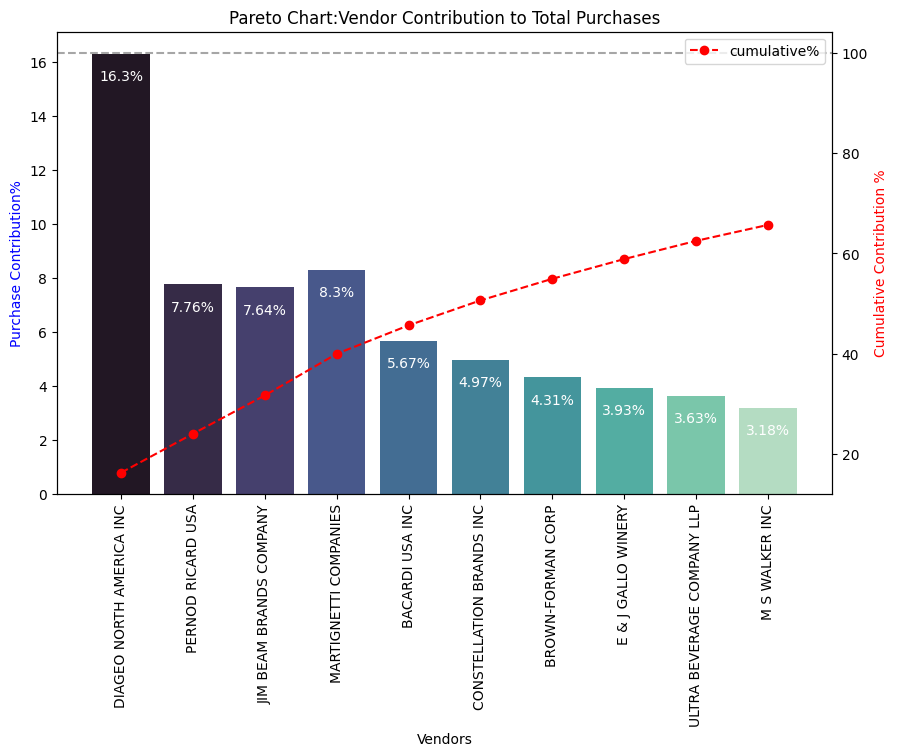

In [69]:
fig,ax1=plt.subplots(figsize=(10,6))

# Bar plot for purchase contribution%
sns.barplot(x=top_vendors['vendorname'],y=top_vendors['purchasecontribution%'],palette="mako",ax=ax1)

for i,value in enumerate(top_vendors['purchasecontribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

# Line plot for cumulative contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors['vendorname'],top_vendors['cumulativecontribution%'],color='red',marker='o',linestyle='dashed',label='cumulative%')

ax1.set_xticklabels(top_vendors['vendorname'],rotation=90)
ax1.set_ylabel('Purchase Contribution%',color='blue')
ax2.set_ylabel('Cumulative Contribution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart:Vendor Contribution to Total Purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

***How much of total procurement is dependent on the top vendors?***

In [70]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['purchasecontribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


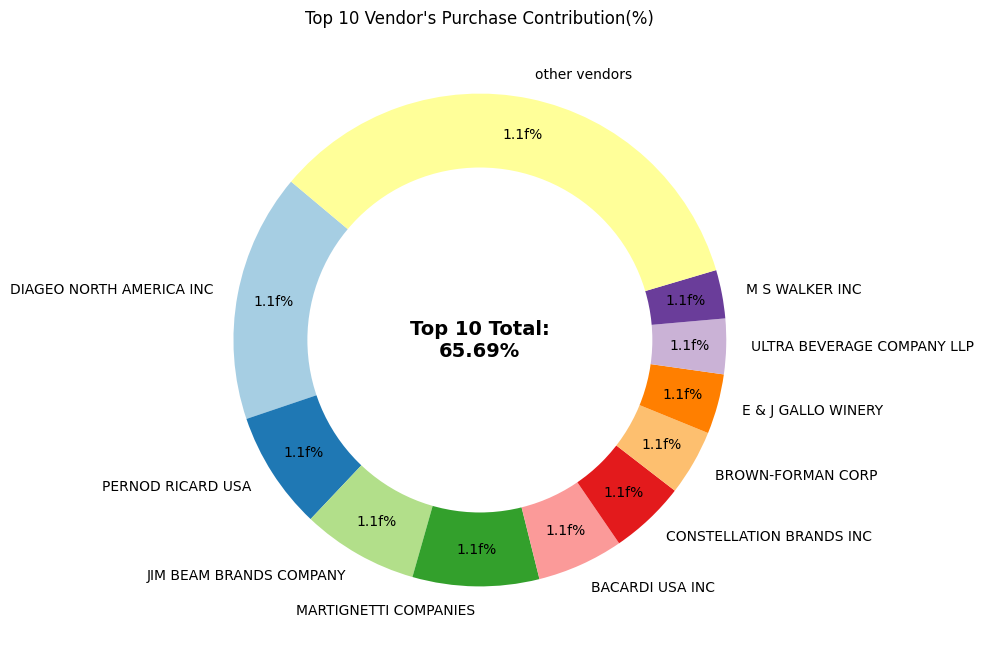

In [75]:
vendors=list(top_vendors['vendorname'].values)
purchase_contributions=list(top_vendors['purchasecontribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100-total_contribution

# Append "other vendors" category
vendors.append("other vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contributions,labels=vendors,autopct="1.1f%%",
                             startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut effect"
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#add total contribution annotaion in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Purchase Contribution(%)")
plt.show()




***Does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost savings?***

In [76]:
df['unitpurchaseprice']=df['totalpurchasedollars']/df['totalpurchasequantity']

In [77]:
df["ordersize"]=pd.qcut(df['totalpurchasequantity'],q=3,labels=["Small","Medium","Large"])

In [78]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
Small,39.068186
Medium,15.486414
Large,10.777625


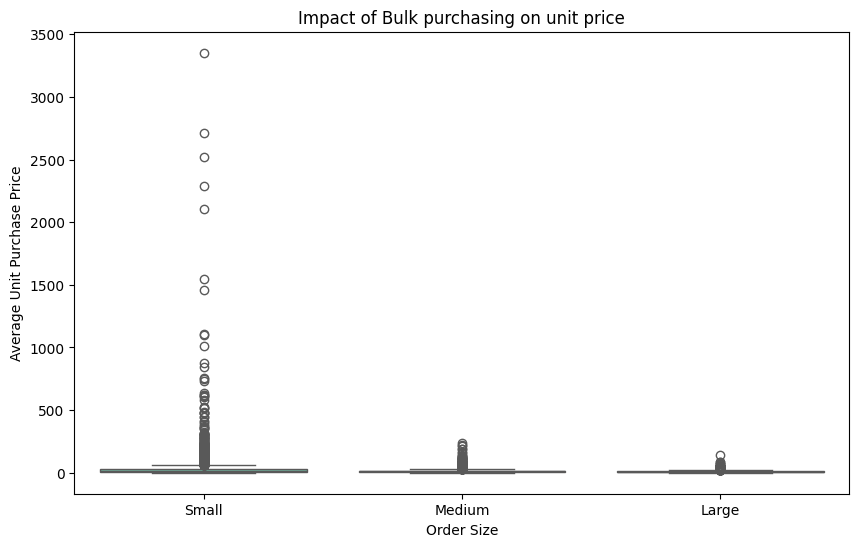

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="ordersize",y="unitpurchaseprice",palette="Set2")
plt.title("Impact of Bulk purchasing on unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

***Which vendors have low inventory turnover,indicating excess stock and slow-moving products?***

In [83]:
df[df['stockturnover']<1].groupby('vendorname')[['stockturnover']].mean().sort_values('stockturnover').head(10)

,stockturnover
vendorname,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


***How much capital is locked in unsold inventory per vendor,and which vendors contribute the most to it***

In [85]:
df["unsoldinventoryvalue"]=(df["totalpurchasequantity"]-df['totalsalesquantity'])*df['purchaseprice']
print('Total unsold capital:',format_dollars(df["unsoldinventoryvalue"].sum()))

Total unsold capital: 2.71M


In [86]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor=df.groupby("vendorname")["unsoldinventoryvalue"].sum().reset_index()

# Sort Vendors with Highest Locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values("unsoldinventoryvalue",ascending=False)
 inventory_value_per_vendor["unsoldinventoryvalue"]=inventory_value_per_vendor["unsoldinventoryvalue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,vendorname,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


**What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?**

In [12]:
top_threshold=df["totalsalesdollars"].quantile(0.75)
low_threshold=df["totalsalesdollars"].quantile(0.25)

In [13]:
top_vendors=df[df["totalsalesdollars"]>= top_threshold]["profitmargin"].dropna()
low_vendors=df[df["totalsalesdollars"]<= low_threshold]["profitmargin"].dropna()

In [14]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: profitmargin, Length: 2141, dtype: float64

In [15]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) #standard error
    t_critical=stats.t.ppf((1 + confidence)/2,df=len(data))
    margin_of_error=t_critical * std_err
    return mean_val,mean_val -  margin_of_error,mean_val + margin_of_error

Top Vendors 95% CI:(30.74),31.61),Mean: 31.18
Low Vendors 95% CI:(40.50),42.64),Mean: 41.57


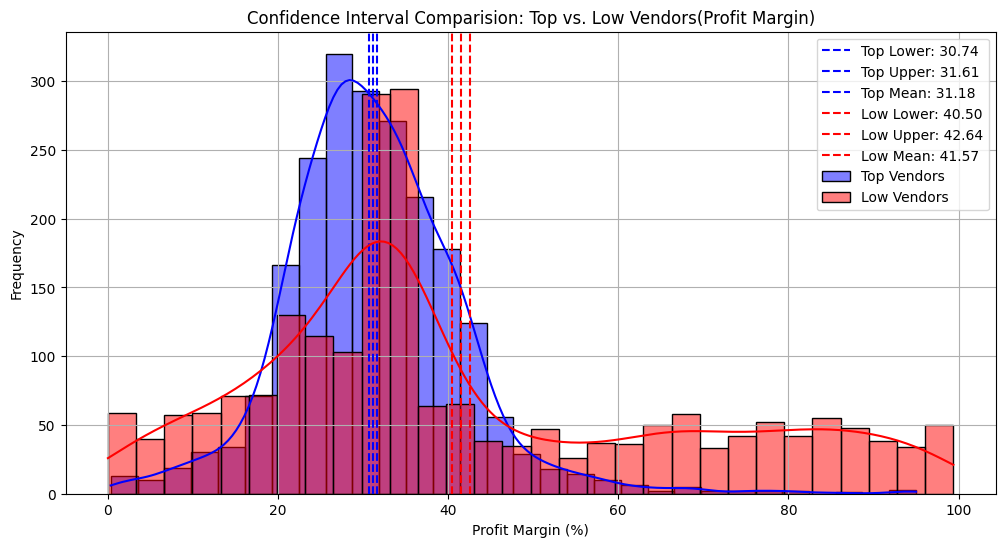

In [17]:
top_mean, top_lower, top_upper=confidence_interval(top_vendors)
low_mean,low_lower, low_upper=confidence_interval(low_vendors)

print(f"Top Vendors 95% CI:({top_lower:.2f}),{top_upper:.2f}),Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI:({low_lower:.2f}),{low_upper:.2f}),Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors,kde=True,color="blue",bins=30,alpha=0.5,label="Top Vendors")
plt.axvline(top_lower,color="blue",linestyle="--",label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper,color="blue",linestyle="--",label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,color="blue",linestyle="--",label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label="Low Vendors")
plt.axvline(low_lower,color="red",linestyle="--",label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper,color="red",linestyle="--",label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,color="red",linestyle="--",label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparision: Top vs. Low Vendors(Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

**Is there a significant difference in profit margins between top-performing and low-performing vendors?**

**Hypothesis:**

- **H₀ (Null Hypothesis):** There is no significant difference in the mean profit margins of top-performing and low-performing vendors.  
- **H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are significantly different.


In [19]:
top_threshold=df["totalsalesdollars"].quantile(0.75)
low_threshold=df["totalsalesdollars"].quantile(0.25)

top_vendors=df[df["totalsalesdollars"]>= top_threshold]["profitmargin"].dropna()
low_vendors=df[df["totalsalesdollars"]<= low_threshold]["profitmargin"].dropna()

#Perform  two-sample T-Test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f},P-Value:{p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀:No significant difference in profit margins.")


T-Statistic: -17.6695,P-Value:0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
